# Challenge : Comment construire le nouveau hit 2019 ?

In [110]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re
import billboard
import seaborn as sns
from scipy import stats
import requests
from urllib.request import urlopen as uRequest
from bs4 import BeautifulSoup
import json
import spotify_token as st
import spotipy.util as util
import spotipy

# Tendances des musiques

In [111]:
path = "/Users/valentinphetchanpheng/Documents/MS BGD Telecom ParisTech/Kit Data Science/"
data = pd.read_csv(path + "music.csv")
print("Dimension data : ", data.shape)
pd.set_option('display.max_columns', 60)
data.head(10)

Dimension data :  (10000, 35)


,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,key_confidence,latitude,location,longitude,loudness,mode,mode_confidence,release.id,release.name,similar,song.hotttnesss,song.id,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year
0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.581794,1.0,0.736,37.157357,California - LA,-63.933358,-11.197,0,0.636,300848,Fear Itself,ARV4KO21187FB38008,0.602120,SOMZWCG12A8C13C480,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,0.630630,6.0,0.169,35.149680,"Memphis, TN",-90.048920,-9.843,0,0.430,300822,Dimensions,ARSZWK21187B9B26D7,NaN,SOCIWDW12A8C13D406,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,0.487357,8.0,0.643,37.157357,Not available,-63.933358,-9.689,1,0.565,514953,Las Numero 1 De La Sonora Santanera,ARFSJUG11C8A421AAD,NaN,SOXVLOJ12AB0189215,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,0.630382,0.0,0.751,37.157357,"London, England",-63.933358,-9.013,1,0.749,287650,Friend Or Foe,AR4R0741187FB39AF2,NaN,SONHOTT12A8C13493C,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.651046,2.0,0.092,37.157357,Not available,-63.933358,-4.501,1,0.371,611336,Muertos Vivos,ARUA62A1187B99D9B0,0.604501,SOFSOCN12A8C143F5D,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007
5,0.385471,ARKFYS91187B98E58F,Jeff And Sheri Easter,NaN,0.0,0.121,1.17118,0.438,0.74856,267.70240,2.264,0.535293,5.0,0.635,37.157357,Not available,-63.933358,-9.323,1,0.557,41838,Ordinary Day,ARHNMEZ11F50C4706C,NaN,SOYMRWW12A6D4FAB14,254.270,0.136,0.53929,147.782,southern gospel,1.000000,3.0,0.454,The Moon And I (Ordinary Day Album Version),0
6,0.261941,ARD0S291187B9B7BF5,Rated R,NaN,0.0,0.709,0.27253,0.709,0.27253,114.78159,0.096,0.556496,1.0,0.000,37.157357,Ohio,-63.933358,-17.302,1,0.000,25824,Da Ghetto Psychic,ARF93II1187B99F981,NaN,SOMJBYD12A6D4F8557,114.782,0.467,0.05611,111.787,breakbeat,1.000000,1.0,0.000,Keepin It Real (Skit),0
7,0.605507,AR10USD1187B99F3F1,Tweeterfriendly Music,NaN,0.0,0.142,0.65428,0.234,0.65428,189.57016,0.319,0.801136,4.0,0.000,37.157357,"Burlington, Ontario, Canada",-63.933358,-11.642,0,0.160,8876,Gin & Phonic,ARJXL4Z1187B9A5920,NaN,SOHKNRJ12A6701D1F8,181.023,0.292,0.36129,101.430,post-hardcore,0.999818,3.0,0.408,Drop of Rain,0
8,0.332276,AR8ZCNI1187B9A069B,Planet P Project,NaN,0.0,0.806,1.91886,0.440,1.22595,269.81832,5.300,0.426668,4.0,0.717,37.157357,Not available,-63.933358,-13.496,1,0.652,358182,Pink World,ARWVP631187FB4D016,0.265861,SOIAZJW12AB01853F1,258.990,0.121,1.22595,86.643,new wave,0.959766,4.0,0.487,Pink World,1984
9,0.422706,ARNTLGG11E2835DDB9,Clp,NaN,0.0,0.047,0.62445,1.000,0.09933,266.39628,0.084,0.550514,7.0,0.053,37.157357,Not available,-63.933358,-6.697,0,0.473,692313,Superinstrumental,ARAR1XA11C8A415BE5,NaN,SOUDSGM12AC9618304,261.747,1.000,0.09933,114.041,breakcore,0.915602,4.0,0.878,Insatiable (Instrumental Version),0


## Analyse Popularité

Text(0.5, 1.0, 'Familiarity vs Song Hotness')

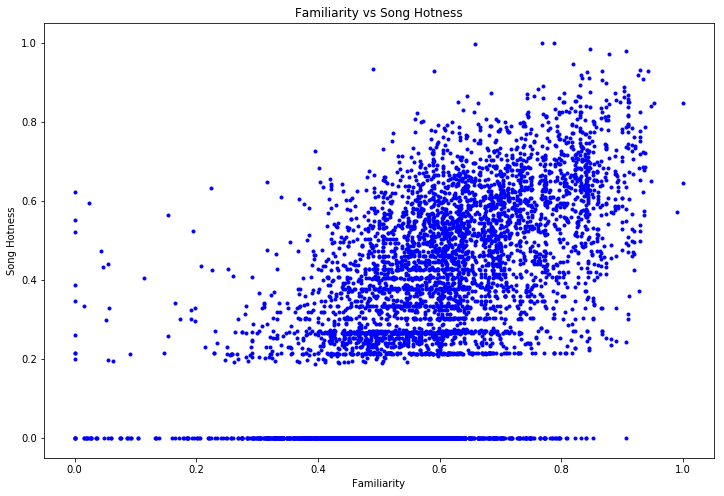

In [112]:
plt.figure(figsize=(12,8))
plt.plot(data["familiarity"], data["song.hotttnesss"], '.', color='blue')
plt.xlabel("Familiarity")
plt.ylabel("Song Hotness")
plt.title("Familiarity vs Song Hotness")

Text(0.5, 1.0, 'Artist Hotness vs Song Hotness')

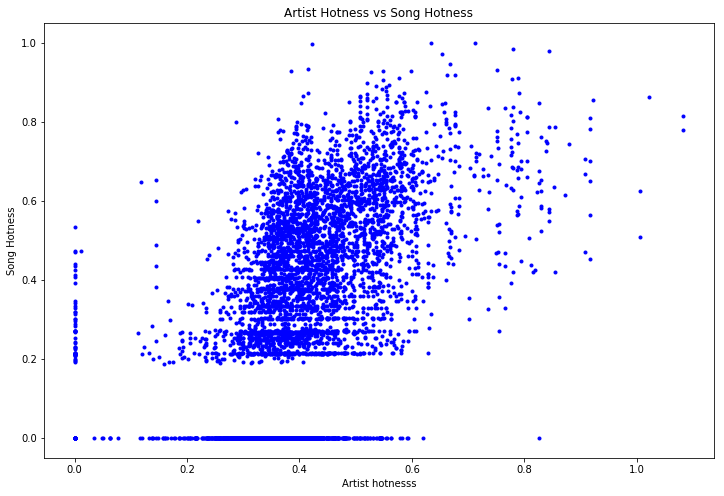

In [113]:
plt.figure(figsize=(12,8))
plt.plot(data["artist.hotttnesss"], data["song.hotttnesss"], '.', color='blue')
plt.xlabel("Artist hotnesss")
plt.ylabel("Song Hotness")
plt.title("Artist Hotness vs Song Hotness")

# Analyse Structure

Text(0.5, 1.0, 'Tempo vs Song Hotness')

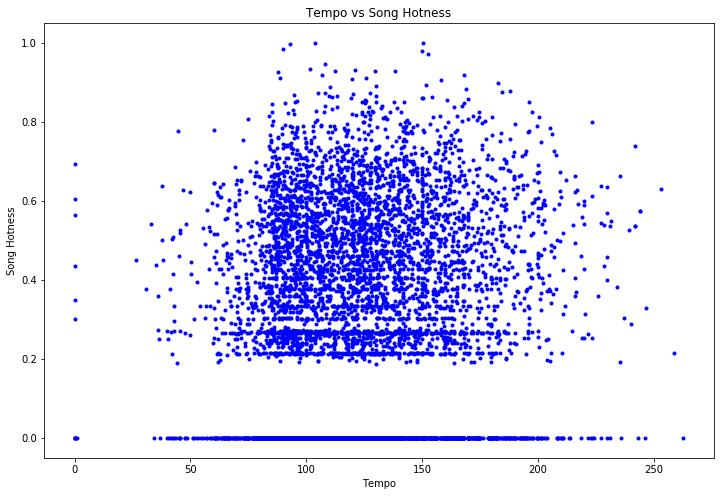

In [114]:
plt.figure(figsize=(12,8))
plt.plot(data["tempo"], data["song.hotttnesss"], '.', color='blue')
plt.xlabel("Tempo")
plt.ylabel("Song Hotness")
plt.title("Tempo vs Song Hotness")

## Analyse TOP 50 Mondial sur Spotify

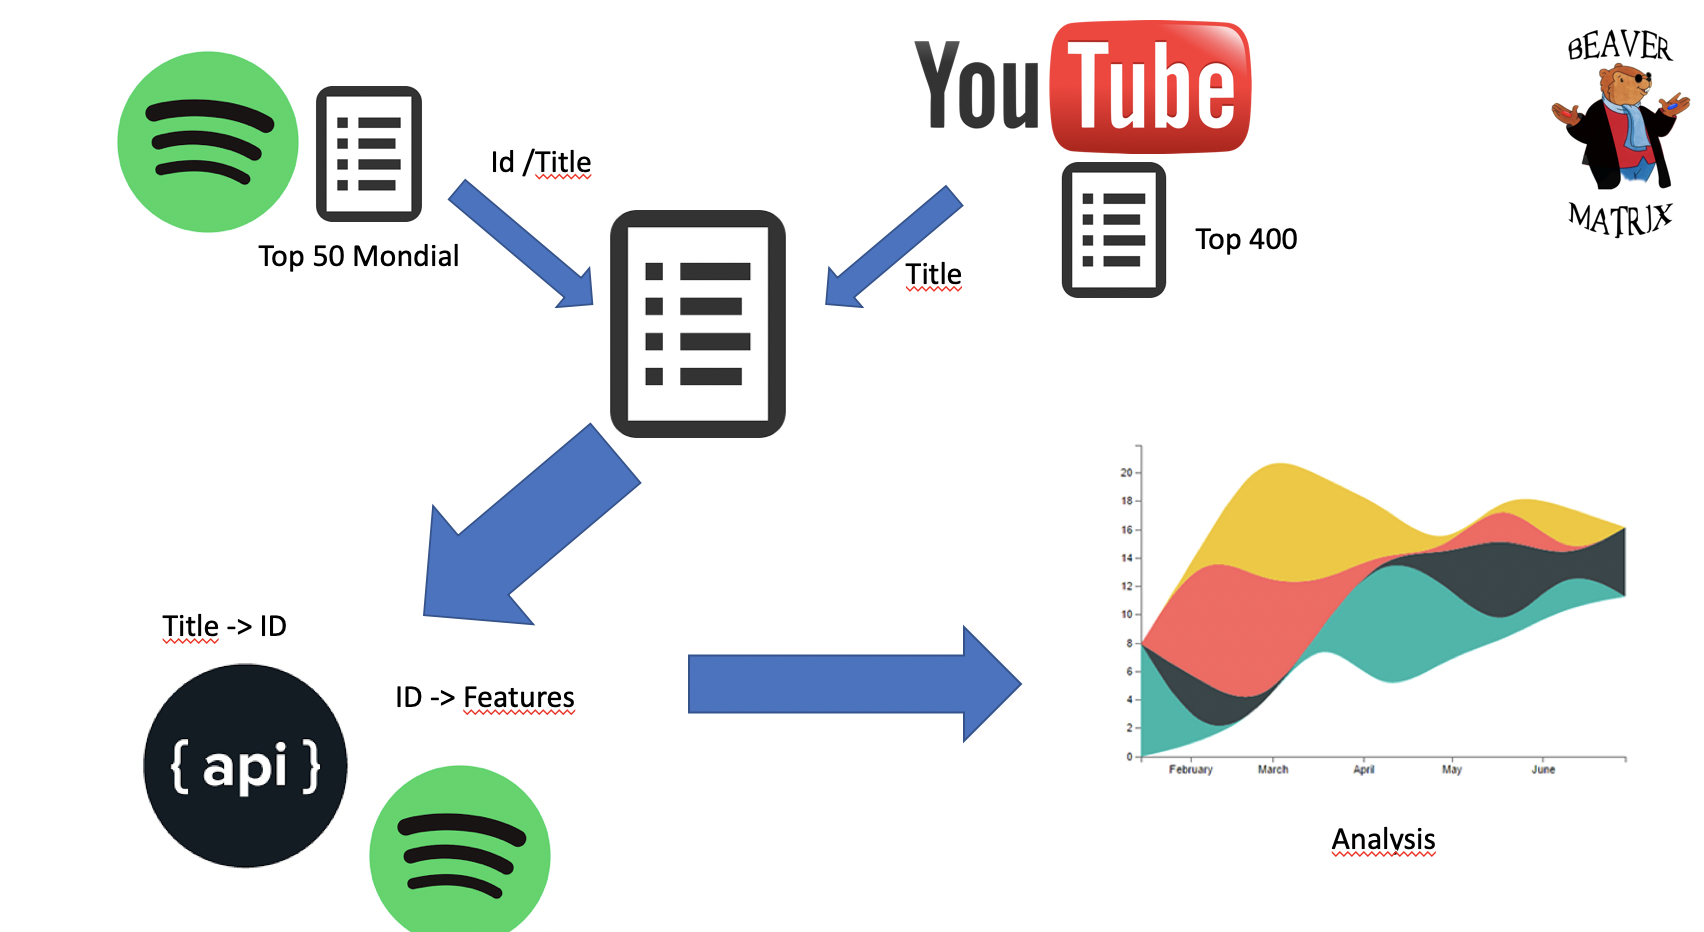

In [115]:
from IPython.display import Image
Image(filename="Screen Shot 2018-11-30 at 16.40.21.png")

In [116]:
def get_tracks_id(uri,sp):
	track_id_uris = []
	username = uri.split(':')[2]
	playlist_id = uri.split(':')[4]
	results = sp.user_playlist(username, playlist_id)
	for song in results['tracks']['items']:
		track_id_uris.append(song['track']['id'])


	return track_id_uris

def get_tracks_artists(uri,sp):
	track_id_uris = []
	artist_name = []
	username = uri.split(':')[2]
	playlist_id = uri.split(':')[4]
	results = sp.user_playlist(username, playlist_id)
	for song in results['tracks']['items']:
		track_id_uris.append(song['track']['id'])
		artist_name.append(song['track']['artists'][0]['name'])

	df = pd.DataFrame(data ={'artist':artist_name,'id':track_id_uris})
	return df

def get_featured_playlists_uris(name, sp):
	response = sp.featured_playlists()
	#print(response['message'])
	uri = ''

	while response:
		playlists = response['playlists']
		for i, item in enumerate(playlists['items']):
			if item['name'] == name:
				uri = item['uri']
		if playlists['next']:
			response = sp.next(playlists)
		else:
			response = None
	return uri

In [117]:
client_id = "ae2a0a93e2594654bd054f108664a9de"
client_secret = "15d598eed3ea4f5b8ac76c63adb0eee5"
username = '11173741361'
token = util.prompt_for_user_token(username,scope="user-read-private", client_id = client_id, client_secret = client_secret, redirect_uri='http://localhost:8080')
sp = spotipy.Spotify(auth=token)
uri1 = get_featured_playlists_uris('Today\'s Top Hits',sp)
# ID des musiques du top 50 spotify
tracks_id = get_tracks_id(uri1,sp)
tracks_id_world = get_tracks_id("spotify:user:spotifycharts:playlist:37i9dQZEVXbMDoHDwVN2tF",sp)
df_artist = get_tracks_artists(uri1,sp)
df_artist.head(5)

,artist,id
0,Ariana Grande,2rPE9A1vEgShuZxxzR2tZH
1,Halsey,5p7ujcrUXASCNwRaWNHR1C
2,Ellie Goulding,5JEx7HbmvHQQswJCsoo9rA
3,6ix9ine,4m5Cd9kAbIxg6t9sMrQWtk
4,Post Malone,1A6OTy97kk0mMdm78rHsm8


# Audio Features Top 50 Spotify

In [118]:
data = st.start_session("nekostyle@hotmail.fr","firestarkspotify")
access_token = data[0]
expiration_date = data[1]
spotify = spotipy.Spotify(auth=access_token)

df_audio_features = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

for el in tracks_id:
    df_audio_features = df_audio_features.append(spotify.audio_features(el)[0], ignore_index=True)
    
df_audio_features.drop(['uri', 'track_href', 'analysis_url'], axis = 1, inplace = True)
print("Dimension : ", df_audio_features.shape)
df_audio_features.head(10)

Dimension :  (50, 15)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature
0,0.724,0.647,1,-5.642,1,0.0658,0.2800,0,0.1020,0.435,106.960,audio_features,2rPE9A1vEgShuZxxzR2tZH,207333,4
1,0.752,0.488,6,-7.050,1,0.0705,0.2970,9.11e-06,0.0936,0.533,136.041,audio_features,5p7ujcrUXASCNwRaWNHR1C,201661,4
2,0.574,0.758,1,-5.029,0,0.0621,0.0969,0,0.3950,0.492,144.111,audio_features,5JEx7HbmvHQQswJCsoo9rA,182623,4
3,0.820,0.691,6,-6.646,0,0.0723,0.0115,0,0.3440,0.683,142.027,audio_features,4m5Cd9kAbIxg6t9sMrQWtk,135739,4
4,0.753,0.498,2,-5.610,1,0.0504,0.5510,0,0.0706,0.927,89.950,audio_features,1A6OTy97kk0mMdm78rHsm8,158053,4
5,0.654,0.316,0,-14.351,1,0.1090,0.6850,0.0333,0.1170,0.186,145.074,audio_features,7wC5eZcFS1Q1BsQ35DU6H4,210376,4
6,0.665,0.699,11,-5.265,1,0.0578,0.4230,0,0.0969,0.585,124.896,audio_features,5tAa8Uaqr4VvA3693mbIhU,190932,4
7,0.540,0.439,10,-8.591,1,0.1150,0.6350,1.93e-05,0.0993,0.371,167.908,audio_features,7vGGAJBkHKxKtOnGjQduDV,209547,4
8,0.758,0.602,10,-7.909,0,0.0940,0.0376,4.77e-06,0.1110,0.519,155.038,audio_features,61sqsOPon94ecMskeEXwev,176056,4
9,0.693,0.575,9,-6.998,1,0.0801,0.3740,0,0.2520,0.492,117.999,audio_features,14sOS5L36385FJ3OL8hew4,211362,4


Text(0.5, 1.0, 'Tempo vs Danceability')

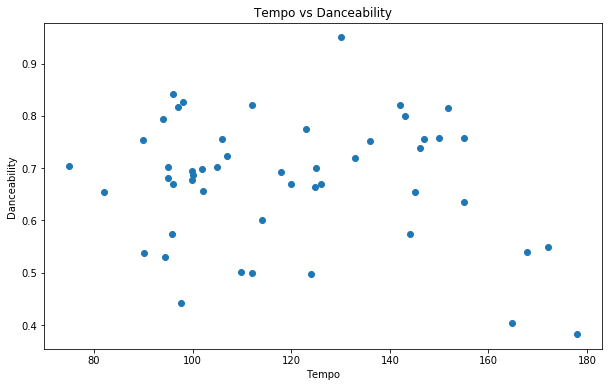

In [119]:
plt.figure(figsize=(10,6))
plt.plot(df_audio_features["tempo"], df_audio_features["danceability"], 'o')
plt.xlabel("Tempo")
plt.ylabel("Danceability")
plt.title("Tempo vs Danceability")

Text(0.5, 1.0, 'Energy vs Deancability')

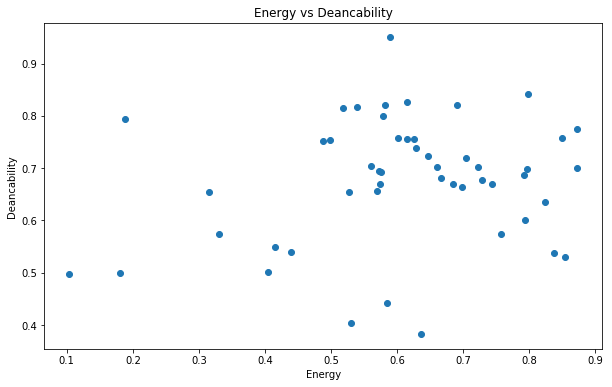

In [120]:
plt.figure(figsize=(10,6))
plt.plot(df_audio_features["energy"], df_audio_features["danceability"], 'o')
plt.xlabel("Energy")
plt.ylabel("Deancability")
plt.title("Energy vs Deancability")

# Fréquence des keys et tonalités des top morceaux 

Text(0.5, 1.0, 'Fréquence des clés')

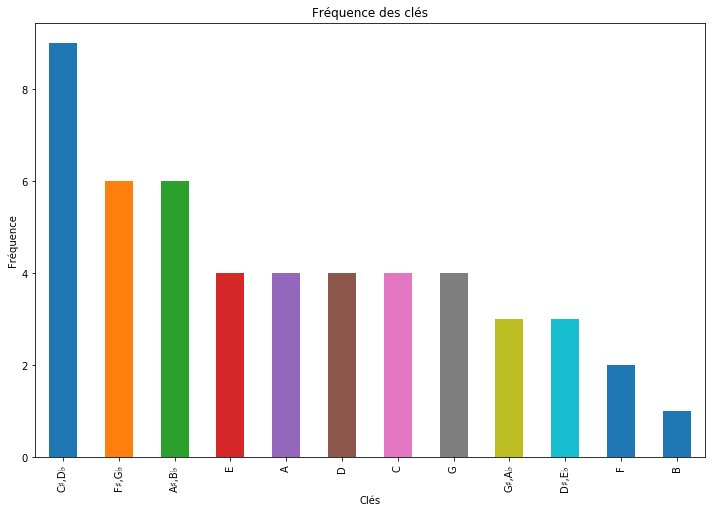

In [121]:
plt.figure(figsize=(12,8))
df_audio_features["keyName"] = df_audio_features["key"].map({0 : "C", 1 : "C♯,D♭", 2 : "D", 3 : "D♯,E♭", 4 : "E", 5 :  "F", 6 : "F♯,G♭",7 : "G",8 : "G♯,A♭",9 : "A",10 : "A♯,B♭",11 : "B"})
df_audio_features["modeName"] = df_audio_features["mode"].map({0 : "minor",1 : "major"})
df_audio_features["keyName"].value_counts().plot('bar')
plt.xlabel("Clés")
plt.ylabel("Fréquence")
plt.title("Fréquence des clés")

Text(0.5, 1.0, 'Fréquence de la tonalité')

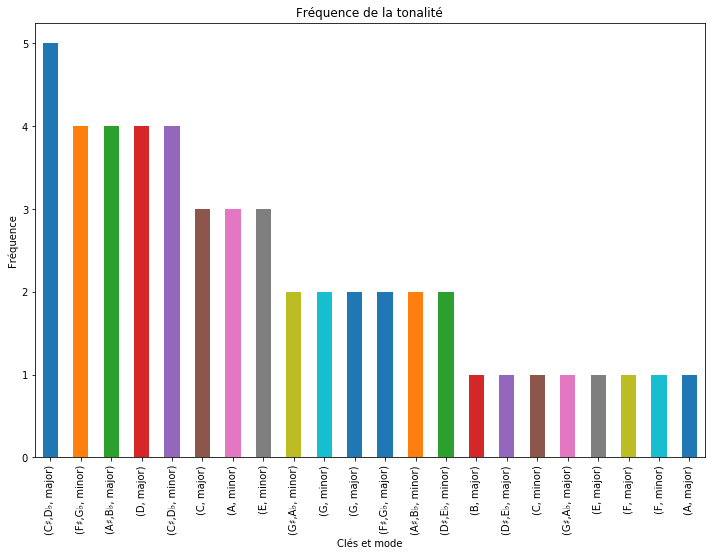

In [122]:
plt.figure(figsize=(12,8))
df_audio_features.groupby(["keyName", "modeName"]).size().sort_values(ascending=False).plot("bar")
plt.xlabel("Clés et mode")
plt.ylabel("Fréquence")
plt.title("Fréquence de la tonalité")


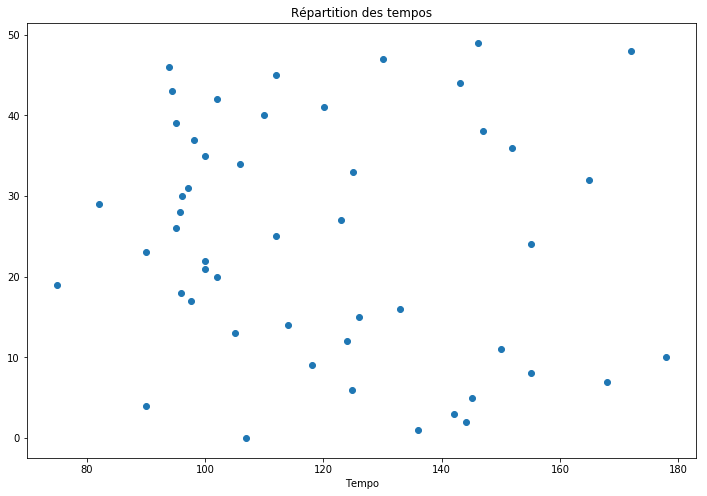

In [123]:
x = df_audio_features.index
y = df_audio_features['tempo']
plt.figure(figsize=(12,8))
plt.title('Répartition des tempos')
plt.xlabel('Tempo')
plt.scatter(y,x)
plt.show()

# Corrélation ?

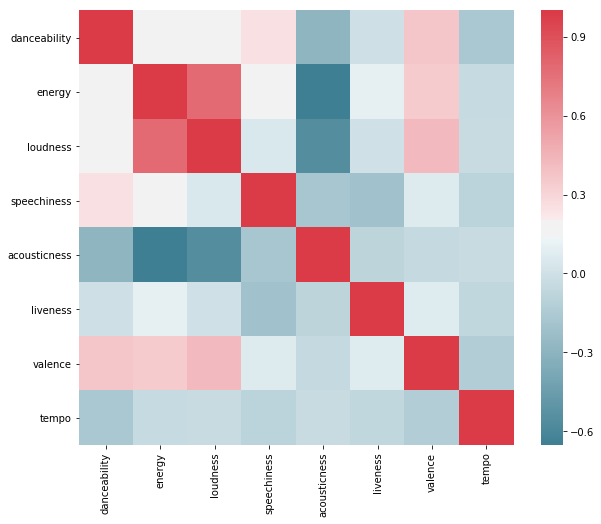

In [124]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_audio_features.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

# DataFrame Artist

In [125]:
df_audio_features.groupby(["keyName", "modeName"]).size().sort_values(ascending=False)

keyName  modeName
C♯,D♭    major       5
F♯,G♭    minor       4
A♯,B♭    major       4
D        major       4
C♯,D♭    minor       4
C        major       3
A        minor       3
E        minor       3
G♯,A♭    minor       2
G        minor       2
         major       2
F♯,G♭    major       2
A♯,B♭    minor       2
D♯,E♭    minor       2
B        major       1
D♯,E♭    major       1
C        minor       1
G♯,A♭    major       1
E        major       1
F        major       1
         minor       1
A        major       1
dtype: int64

In [126]:
df = pd.merge(df_audio_features, df_artist[['artist', 'id']], on='id')

df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature,keyName,modeName,artist
0,0.724,0.647,1,-5.642,1,0.0658,0.2800,0,0.1020,0.435,106.960,audio_features,2rPE9A1vEgShuZxxzR2tZH,207333,4,"C♯,D♭",major,Ariana Grande
1,0.752,0.488,6,-7.050,1,0.0705,0.2970,9.11e-06,0.0936,0.533,136.041,audio_features,5p7ujcrUXASCNwRaWNHR1C,201661,4,"F♯,G♭",major,Halsey
2,0.574,0.758,1,-5.029,0,0.0621,0.0969,0,0.3950,0.492,144.111,audio_features,5JEx7HbmvHQQswJCsoo9rA,182623,4,"C♯,D♭",minor,Ellie Goulding
3,0.820,0.691,6,-6.646,0,0.0723,0.0115,0,0.3440,0.683,142.027,audio_features,4m5Cd9kAbIxg6t9sMrQWtk,135739,4,"F♯,G♭",minor,6ix9ine
4,0.753,0.498,2,-5.610,1,0.0504,0.5510,0,0.0706,0.927,89.950,audio_features,1A6OTy97kk0mMdm78rHsm8,158053,4,D,major,Post Malone
5,0.654,0.316,0,-14.351,1,0.1090,0.6850,0.0333,0.1170,0.186,145.074,audio_features,7wC5eZcFS1Q1BsQ35DU6H4,210376,4,C,major,Billie Eilish
6,0.665,0.699,11,-5.265,1,0.0578,0.4230,0,0.0969,0.585,124.896,audio_features,5tAa8Uaqr4VvA3693mbIhU,190932,4,B,major,Zara Larsson
7,0.540,0.439,10,-8.591,1,0.1150,0.6350,1.93e-05,0.0993,0.371,167.908,audio_features,7vGGAJBkHKxKtOnGjQduDV,209547,4,"A♯,B♭",major,Khalid
8,0.758,0.602,10,-7.909,0,0.0940,0.0376,4.77e-06,0.1110,0.519,155.038,audio_features,61sqsOPon94ecMskeEXwev,176056,4,"A♯,B♭",minor,benny blanco
9,0.693,0.575,9,-6.998,1,0.0801,0.3740,0,0.2520,0.492,117.999,audio_features,14sOS5L36385FJ3OL8hew4,211362,4,A,major,Kygo


Text(0.5, 1.0, 'Artiste les plus présents dans le TOP 50')

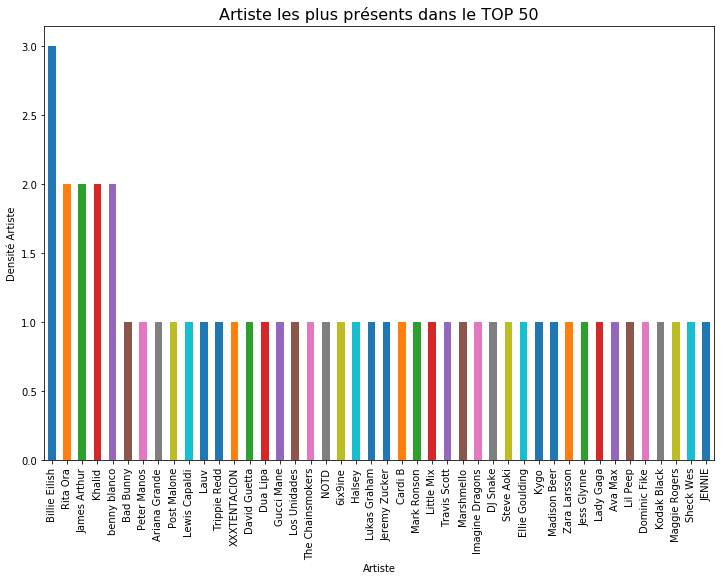

In [130]:
plt.figure(figsize=(12,8))
df["artist"].value_counts().plot('bar')
plt.xlabel("Artiste")
plt.ylabel("Densité Artiste")
plt.title("Artiste les plus présents dans le TOP 50", fontsize = 16)

# Conclusion